In [5]:
from pyraysum import prs, Geometry, Model, Control
import numpy as np
import ipywidgets as widgets

ModuleNotFoundError: No module named 'ipywidgets'

In [32]:
def all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge, trend, ani, scale = 20, print_model = False, plot_model = False):
    thickn = np.array(thickn) * 1000
    flag = [1 if i == 0 else 0 for i in ani]
    model = Model(thickn, rho, vp, vs=vs, strike=strike, dip=dip, flag=flag, plunge=plunge, trend=trend, ani = ani)
    if print_model:
        print("The Model configuration is as below:")
        print(model)
    # print(plunge, Trend, ani)
    geom = Geometry(baz, slow)
    npts = 2500
    dt = 0.2
    rc = Control(rot=1, mults=1, verbose=False, npts=npts, dt=dt)
    result = prs.run(model, geom, rc, rf=True)
    result.filter('rfs', 'lowpass', freq=1., zerophase=True, corners=2)
    if plot_model:
        result.plot('rfs', tmin=-2, tmax=15, scale=scale)
        model.plot()
        # geom.plot()
    
    return model, geom, result

In [33]:
def model2l(l1depth, l2depth, l2dip, l2strike, l1vp, l2vp, l1vs, l2vs):
    baz = np.arange(0, 360., 18)
    slow = 0.08
    thickn = np.array([l1depth, l2depth, 0])
    rho = np.array([2000, 3100, 4800])
    vp = np.array([l1vp, l2vp, 8000])
    vs = np.array([l1vs, l2vs, 6500])
    strike = np.array([0, l2strike, 0])
    dip = np.array([0, l2dip, 0])
    plunge = np.array([0, 0, 0])
    trend = np.array([0, 0, 0])
    ani = np.array([0, 0, 0])
    model, geom, result = all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge, trend, ani, scale = 100, print_model = False, plot_model = True)

param1 = widgets.IntSlider(value=35, min=0, max=45, step=2, description='L1 Depth:', continuous_update=False)
param5 = widgets.IntSlider(value=0, min=0, max=30, step=2, description='L2 Depth:', continuous_update=False)
param2 = widgets.IntSlider(value=0, min=0, max=10, step=0.5, description='L2 Dip:', continuous_update=False)
param3 = widgets.IntSlider(value=0, min=0, max=360, step=90, description='L2 Strike:', continuous_update=False)
param4 = widgets.IntSlider(value=6000, min=5500, max=7500, step=200, description='L1 Vp:', continuous_update=False)
param6 = widgets.IntSlider(value=6500, min=6500, max=7800, step=200, description='L2 Vp', continuous_update=False)
param7 = widgets.IntSlider(value=4000, min=4000, max=6000, step=250, description='L1 Vs', continuous_update=False)
param8 = widgets.IntSlider(value=5000, min=4500, max=6500, step=250, description='L2 Vs', continuous_update=False)
widgets.interactive(model2l, l1depth=param1, l2depth=param5, l2dip=param2, l2strike=param3, l1vp=param4, l2vp=param6, l1vs=param7, l2vs=param8)

interactive(children=(IntSlider(value=35, continuous_update=False, description='L1 Depth:', max=45, step=2), I…

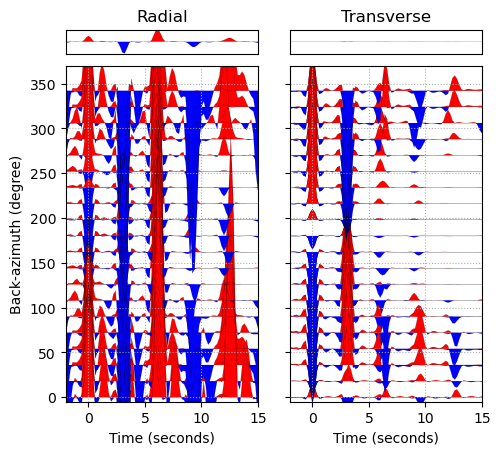

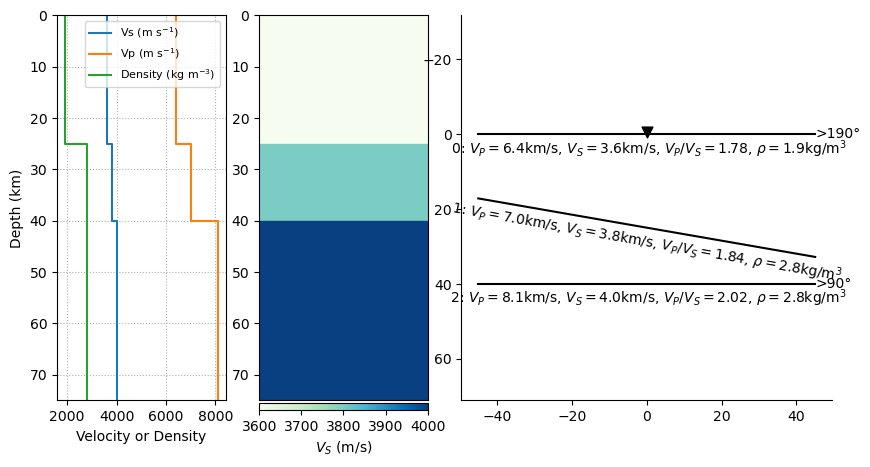

In [34]:
baz = np.arange(0, 360., 18)
slow = np.arange(0.007, 0.08, 0.04)
thickn = [25, 15, 0]   #km
rho = [1900, 2800, 2800]
vp = [6400, 7000, 8100]
vs = [3600, 3800, 4000]
#plane geometry
dip = [0, 10, 0]       #degrees
strike = [100, 100, -0]
#ansitropy
plunge = [0, 0, 0]
trend = [0, 0, 0]
ani = [0, 0, 0]

model, geom, result = all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge, trend, ani, scale = 500, print_model = False, plot_model = True)

In [35]:
from codes_RF.prs_utils import *

X, time = harm_dec_calc(result, sig_len = 1500)
plot_har_dec(X, time)

ValueError: could not broadcast input array from shape (2500,) into shape (1500,)